## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_flights_sample = pd.read_csv("/Users/hugo/Library/CloudStorage/OneDrive-Personal/DATA_Science/Bootcamp/W7/mid-term-project-I/data/raw/flights_sample.csv")


In [13]:
def prepare_data_flights(df):

    
    df.drop(columns=['branded_code_share','mkt_carrier'], inplace=True) #these are the same value as mkt_unique_carrier
    df.drop(columns=['mkt_carrier_fl_num'], inplace=True) ##is the same value as op_carrier_fl_num
    df.drop(columns=['origin_airport_id', 'dest_airport_id'], inplace=True) #using airport codes instead 'origin' and 'dest'
    df.drop(columns=['dup', 'flights'], inplace=True) # have the same values
    df.drop(columns=['no_name'], inplace=True) ##columns not documented on dataset provided by LHL

    df[['city_orig','state_orig']] = df['origin_city_name'].str.split(', ', expand=True)  #split city and name of origin
    df[['city_dest','state_dest']] = df['dest_city_name'].str.split(', ', expand=True)  #split city and name of origin
    df.drop(columns=['origin_city_name','dest_city_name'], inplace=True) #using new city and state columns instead

#change datetime columns and rename columns for easier understanding
    df['fl_date'] = df['fl_date'].astype('datetime64[ns]')
    df.rename(columns={'fl_date': 'FlightDate'}, inplace=True) 

    df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'], unit='m', errors='coerce').dt.strftime("%H:%M")
    df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], unit='m', errors='coerce').dt.strftime("%H:%M")
    df.rename(columns={'crs_dep_time': 'DepartureTime','crs_arr_time': 'ArrivalTime'}, inplace=True) 
    df.rename(columns={'crs_elapsed_time': 'ElapsedTimeFlight,'}, inplace=True)
    df.rename(columns={'crs_elapsed_time': 'ElapsepTimeScheduled'}, inplace=True)
    df.rename(columns={'mkt_unique_carrier': 'UniqueMarketingCarrierCode'}, inplace=True)
    df.rename(columns={'op_unique_carrier': 'UniqueScheduledOperatingCarrierCode'}, inplace=True)
    df.rename(columns={'op_carrier_fl_num': 'FlightNumber'}, inplace=True)
    df.rename(columns={'tail_num': 'TailNumber'}, inplace=True) 
    df.rename(columns={'origin': 'OriginIATA'}, inplace=True) 
    df.rename(columns={'dest': 'DestinationIATA'}, inplace=True) 
    df.rename(columns={'distance': 'DistanceAirports'}, inplace=True)
    df.rename(columns={'city_dest':'DestinationCity','state_dest':'DestinationState','city_orig':'OriginCity','state_orig':'OriginState'}, inplace=True)
    df.rename(columns={'carrier_delay':'Delay_Carrier','weather_delay':'Delay_Weather','nas_delay':'Delay_NationalAirSystem','security_delay':'Delay_Security','late_aircraft_delay':'Delay_LateAircraft'}, inplace=True)

    return df

In [15]:
df_flights_clean = prepare_data_flights(df_flights_sample)
df_flights_clean

,FlightDate,UniqueMarketingCarrierCode,UniqueScheduledOperatingCarrierCode,TailNumber,FlightNumber,OriginIATA,DestinationIATA,DepartureTime,dep_time,dep_delay,...,Delay_NationalAirSystem,Delay_Security,Delay_LateAircraft,first_dep_time,total_add_gtime,longest_add_gtime,OriginCity,OriginState,DestinationCity,DestinationState
0,2018-06-22,DL,DL,N958DL,2718,ATL,BHM,09:58,7.0,209.0,...,0.0,0.0,155.0,NaN,NaN,NaN,Atlanta,GA,Birmingham,AL
1,2018-04-03,AA,OO,N908EV,3261,ORD,FWA,06:49,1851.0,2.0,...,13.0,0.0,2.0,NaN,NaN,NaN,Chicago,IL,Fort Wayne,IN
2,2019-11-24,DL,DL,N931DN,2293,ATL,ELP,08:38,1955.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,El Paso,TX
3,2018-01-24,DL,YX,N216JQ,6155,LGA,DCA,06:00,1753.0,-7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,New York,NY,Washington,DC
4,2018-09-23,HA,HA,N490HA,229,KOA,OGG,17:00,1009.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Kona,HI,Kahului,HI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018-05-10,DL,OO,N8923A,4698,ILM,ATL,18:25,1137.0,32.0,...,0.0,0.0,24.0,NaN,NaN,NaN,Wilmington,NC,Atlanta,GA
99996,2019-10-28,F9,F9,N351FR,778,LAS,DEN,15:22,914.0,-8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Las Vegas,NV,Denver,CO
99997,2019-10-01,DL,DL,N923AT,1958,ATL,ORD,01:33,1528.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Atlanta,GA,Chicago,IL
99998,2018-10-15,UA,UA,N26215,2144,DEN,FSD,05:05,1949.0,124.0,...,0.0,0.0,107.0,NaN,NaN,NaN,Denver,CO,Sioux Falls,SD


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [32]:
df_taxi = df_flights_clean[['FlightDate','DepartureTime','taxi_out','taxi_in','ArrivalTime','OriginCity']]
df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
df_taxi[['hourA','minA']] = df_taxi['ArrivalTime'].str.split(':', expand=True)
#df_taxi['hour'] = df_taxi['DepartureTime'].apply(lambda x : x.hour)
df_taxi[['hourA'
df_taxi.sort_values('taxi_out', ascending=False)

/var/folders/4t/t4gffd517xs3n8dx_yhbc9g80000gn/T/ipykernel_1404/1835751418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
/var/folders/4t/t4gffd517xs3n8dx_yhbc9g80000gn/T/ipykernel_1404/1835751418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi[['hourD','minD']] = df_taxi['DepartureTime'].str.split(':', expand=True)
/var/folders/4t/t4gffd517xs3n8dx_yhbc9g80000gn/T/ipykernel_1404/1835751418.py:3: SettingWithCopy

,FlightDate,DepartureTime,taxi_out,taxi_in,ArrivalTime,OriginCity,hourD,minD,hourA,minA
78648,2018-07-22,08:18,167.0,2.0,14:26,New York,08,18,14,26
90492,2018-09-26,05:05,161.0,3.0,07:50,Washington,05,05,07,50
33428,2018-08-02,01:50,158.0,7.0,07:49,New York,01,50,07,49
38818,2018-01-16,03:07,157.0,7.0,05:14,Houston,03,07,05,14
81138,2018-07-02,01:50,154.0,28.0,04:45,Pittsburgh,01,50,04,45
...,...,...,...,...,...,...,...,...,...,...
99804,2018-08-02,11:30,NaN,NaN,15:00,Baltimore,11,30,15,00
99849,2019-02-01,15:50,NaN,NaN,20:45,Kansas City,15,50,20,45
99883,2019-02-20,22:32,NaN,NaN,00:15,Peoria,22,32,00,15
99884,2019-08-08,10:40,NaN,NaN,15:10,Newark,10,40,15,10


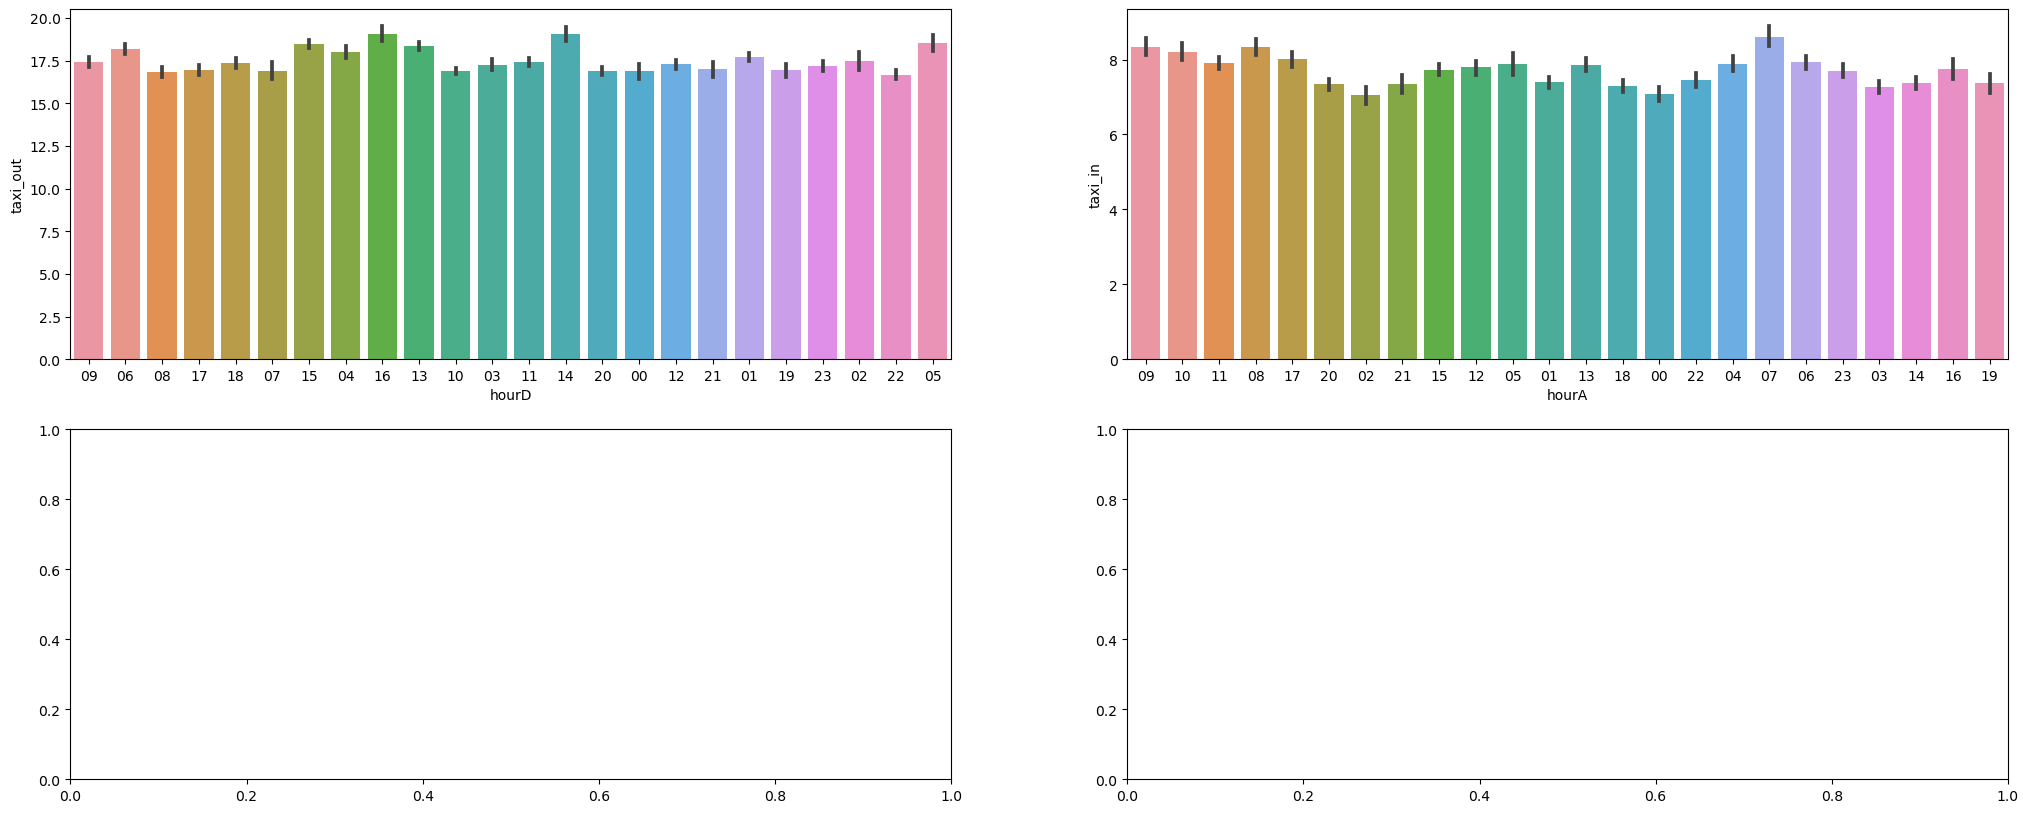

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(25, 10))

sns.barplot(x='hourD', y='taxi_out', data=df_taxi, ax=ax[0,0])
sns.barplot(x='hourA', y='taxi_in', data=df_taxi, ax=ax[0,1])
#sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[0,1], estimator=np.median)
#sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[1,1])
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?